# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [2]:
#load dataset
x_data = np.load("trainset/train_x.npy")
y_data = np.load("trainset/train_y.npy")


#normalize every image
x_data= np.array(x_data,dtype='float32')/255

#train test split
x_train, x_test, y_train, y_test= train_test_split(
    x_data, y_data, test_size=.2, random_state=1234,)
# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('y_train : {}'.format(y_train))
print('y_train shape: {}'.format(y_train.shape))
print('x_train shape: {}'.format(x_train.shape))

x_train : [[1.         0.99607843 0.99215686 ... 0.69411767 0.69803923 0.69803923]
 [1.         1.         0.99215686 ... 0.2        0.22745098 0.16470589]
 [0.9647059  0.972549   0.9254902  ... 0.85490197 0.8745098  0.8745098 ]
 ...
 [1.         0.99215686 1.         ... 0.16862746 0.14901961 0.15294118]
 [0.2627451  0.2784314  0.26666668 ... 0.2627451  0.2627451  0.27450982]
 [1.         0.9882353  1.         ... 0.07450981 0.08235294 0.08235294]]
y_train : [1 2 4 0 5 2 4 3 4 3 1 1 3 5 4 5 1 0 0 1 1 1 3 4 2 0 4 2 0 5 3 1 3 3 2 0 5
 0 1 5 3 4 0 0 1 0 0 0 0 4 5 2 2 3 5 4 4 3 5 5 2 2 1 1 3 1 1 5 3 2 5 3]
y_train shape: (72,)
x_train shape: (72, 8100)


# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [3]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [4]:
im_rows=90
im_cols=90
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print(x_train[0])
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

[[[0.83137256]
  [0.83137256]
  [0.8352941 ]
  ...
  [0.8509804 ]
  [0.8392157 ]
  [0.8392157 ]]

 [[0.827451  ]
  [0.8235294 ]
  [0.8392157 ]
  ...
  [0.8509804 ]
  [0.8509804 ]
  [0.8509804 ]]

 [[0.8352941 ]
  [0.84313726]
  [0.827451  ]
  ...
  [0.8509804 ]
  [0.85490197]
  [0.85490197]]

 ...

 [[0.7607843 ]
  [0.28627452]
  [0.11372549]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.1764706 ]
  [0.15294118]
  [0.11372549]
  ...
  [0.9882353 ]
  [1.        ]
  [1.        ]]

 [[0.14509805]
  [0.1254902 ]
  [0.09411765]
  ...
  [0.99607843]
  [1.        ]
  [1.        ]]]
x_train shape: (68, 90, 90, 1)
x_test shape: (18, 90, 90, 1)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [15]:

#filters= the depth of output image or kernels
output_num = 6

cnn_model= Sequential([
    Input(shape = im_shape),
    Conv2D(filters=32, kernel_size=6, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=4, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(output_num, activation='sigmoid')
])

cnn_model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Show the model's parameters.

In [16]:
cnn_model.summary()
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 85, 85, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 39, 39, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 23104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     2,957,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,001,990 (11.45 MB)

 Trainable params: 3,001,990 (11.45 MB)

 Non-trainable params: 0 (0.00 B)

[]
Num GPUs Available:  0


# Step 6

Train the Model

* Note: You can change the number of epochs


In [17]:
history=cnn_model.fit(
    x_train, 
    y_train, 
    batch_size=16,
    epochs=30, 
    verbose=2,
    validation_data=(x_valid,y_valid),
)

Epoch 1/50
5/5 - 2s - 357ms/step - accuracy: 0.1618 - loss: 1.8600 - val_accuracy: 0.0000e+00 - val_loss: 1.7536
Epoch 2/50
5/5 - 0s - 43ms/step - accuracy: 0.2353 - loss: 1.7817 - val_accuracy: 0.2500 - val_loss: 1.7458
Epoch 3/50
5/5 - 0s - 42ms/step - accuracy: 0.2353 - loss: 1.7328 - val_accuracy: 0.2500 - val_loss: 1.6992
Epoch 4/50
5/5 - 0s - 43ms/step - accuracy: 0.2647 - loss: 1.6798 - val_accuracy: 0.5000 - val_loss: 1.6367
Epoch 5/50
5/5 - 0s - 47ms/step - accuracy: 0.3824 - loss: 1.4764 - val_accuracy: 0.5000 - val_loss: 1.5938
Epoch 6/50
5/5 - 0s - 43ms/step - accuracy: 0.3824 - loss: 1.4615 - val_accuracy: 0.5000 - val_loss: 1.1911
Epoch 7/50
5/5 - 0s - 45ms/step - accuracy: 0.6176 - loss: 1.2520 - val_accuracy: 0.5000 - val_loss: 1.0053
Epoch 8/50
5/5 - 0s - 46ms/step - accuracy: 0.5735 - loss: 1.0031 - val_accuracy: 0.5000 - val_loss: 0.7663
Epoch 9/50
5/5 - 0s - 43ms/step - accuracy: 0.6029 - loss: 1.0407 - val_accuracy: 1.0000 - val_loss: 0.7111
Epoch 10/50
5/5 - 0s - 

Evaluate the test data


In [18]:
scor = cnn_model.evaluate(x_test, y_test, verbose=0)
cnn_model.save('models/cnn.keras')

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.0572
test acc 0.9444


# Step 7 

plot the result

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


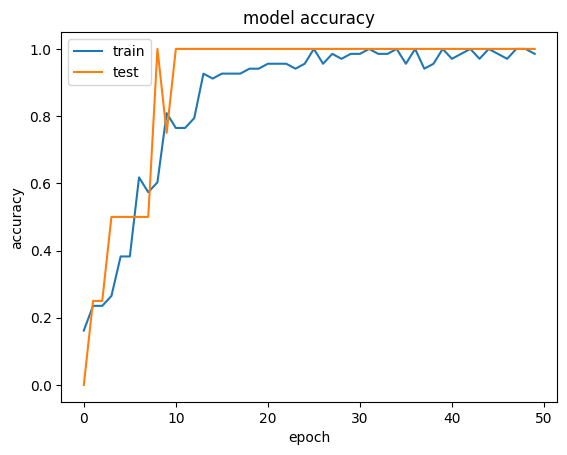

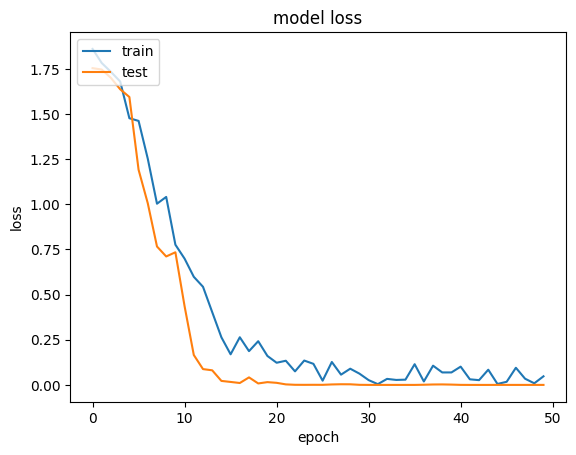

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()